# 나이성별과 고장의 연관성 분석

In [19]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [20]:
df = pd.read_csv("training_data7~12.csv")

## 전처리

1.성별데이터를 한번에 알아볼 수 있게 'M'은 '남자', 'F'는 '여자'로 변경했습니다.

2.0년생이나 2099년생같은 쓰레기값들을 삭제했습니다.

3.고장데이터와 정상데이터의 개수를 맞췄습니다.

In [21]:
df['성별'] = df['성별'].map({'M': '남자', 'F': '여자'})
df = df[(1902 <= df['생년']) & (df['생년'] <= 2022)]
print(df['고장'].value_counts())

faulty_indices = df[df['고장'] == 1].index
random_indices = np.random.choice(faulty_indices, size=9, replace=False)
df = df.drop(random_indices)
print(df['고장'].value_counts())

1    13185
0    13176
Name: 고장, dtype: int64
1    13176
0    13176
Name: 고장, dtype: int64


In [22]:
df2 = df[(df['성별'] == '여자') & (df['생년'] == 1993)]
df2.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간(분),이용거리(M),생년,성별,이용자종류,대여요일,등록일시,고장구분,고장
87,SPB-41322,2022-07-01 9:30,770,목동역5번출구 교통정보센터 앞,2022-07-01 9:34,791,현대하이페리온,4,406.58,1993,여자,내국인,Friday,2022-07-01 13:13,기타,1
107,SPB-51484,2022-07-01 11:15,769,CBS방송국 앞,2022-07-01 11:22,747,목동3단지 상가,6,817.93,1993,여자,내국인,Friday,2022-07-01 11:24,기타,1
170,SPB-50532,2022-07-01 15:39,2012,대림사거리(동작상떼빌아파트),2022-07-01 15:43,2177,신대방역 2번 출구,3,633.67,1993,여자,내국인,Friday,2022-07-01 18:25,타이어,1
199,SPB-80637,2022-07-01 17:13,3555,양지사거리(센트라스APT 115동앞),2022-07-01 17:17,557,도선동 주민센터 앞,4,350.00,1993,여자,내국인,Friday,2022-07-01 17:19,기타,1
331,SPB-59061,2022-07-01 20:30,287,영등포전화국사거리 (서강어린이공원),2022-07-01 21:04,5059,화곡2동주민센터,33,5270.00,1993,여자,내국인,Friday,2022-07-01 19:19,단말기,0


`성별과연령대`, `연령대` 열을 추가했습니다.

80대부터는 `70대이상`이라고 그룹지었습니다.
10살 미만은 `10대이하`라고 그룹지었습니다

In [23]:
df['연령대'] = df['생년'].apply(lambda x: f"10대" if 10 <= (2022 - x + 1) < 20 else f"{((2022 - x + 1) // 10) * 10}대")
df.loc[(df['생년'] <= 1953), '연령대'] = '70대이상'
df.loc[(df['생년'] >= 2004), '연령대'] = '10대이하'
df['성별과연령대'] = df['연령대'] + df['성별']
df.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간(분),이용거리(M),생년,성별,이용자종류,대여요일,등록일시,고장구분,고장,연령대,성별과연령대
0,SPB-50867,2022-07-01 0:15,864,순천향대학병원(한남오거리),2022-07-01 0:32,4607,국립중앙박물관 -용산가족공원 앞,16,3280.00,1992,남자,내국인,Friday,2022-07-01 19:53,안장,1,30대,30대남자
1,SPB-40789,2022-07-01 0:23,5752,풍납백제문화공원 옆 인근,2022-07-01 0:31,1009,천호역4번출구(현대백화점),7,1196.21,2001,남자,내국인,Friday,2022-07-01 1:08,안장,1,20대,20대남자
2,SPB-40134,2022-07-01 0:32,1339,삼성전자서비스 성북센터,2022-07-01 0:57,1306,한성대입구역2번출구,25,3409.46,1998,여자,내국인,Friday,2022-07-01 0:57,페달,1,20대,20대여자
3,SPB-50932,2022-07-01 0:59,670,삼육서울병원 버스정류장,2022-07-01 1:09,628,휘봉고등학교 앞,9,1103.01,1997,남자,내국인,Friday,2022-07-01 1:09,체인,1,20대,20대남자
4,SPB-55153,2022-07-01 1:00,1661,당현천근린공원,2022-07-01 1:04,1656,중앙하이츠 아파트 입구,4,852.32,1997,남자,내국인,Friday,2022-07-01 8:03,기타,1,20대,20대남자


<br>

## 상관관계 분석

### 1. 성별&연령대와 고장의 연관성

고장          0     1
성별과연령대             
10대이하남자   696   557
10대이하여자   261   195
20대남자    2393  2111
20대여자    1867  1890
30대남자    2312  2394
30대여자    1444  1674
40대남자    1406  1612
40대여자     756   834
50대남자     947   900
50대여자     516   507
60대남자     385   327
60대여자     119   107
70대이상남자    52    46
70대이상여자    22    22

10대이하남자의 정상이 고장보다 24.96% 많습니다.
10대이하여자의 정상이 고장보다 33.85% 많습니다.
20대남자의 정상이 고장보다 13.36% 많습니다.
고장! 20대여자의 고장이 정상보다 1.23% 많습니다.
고장! 30대남자의 고장이 정상보다 3.55% 많습니다.
고장! 30대여자의 고장이 정상보다 15.93% 많습니다.
고장! 40대남자의 고장이 정상보다 14.65% 많습니다.
고장! 40대여자의 고장이 정상보다 10.32% 많습니다.
50대남자의 정상이 고장보다 5.22% 많습니다.
50대여자의 정상이 고장보다 1.78% 많습니다.
60대남자의 정상이 고장보다 17.74% 많습니다.
60대여자의 정상이 고장보다 11.21% 많습니다.
70대이상남자의 정상이 고장보다 13.04% 많습니다.
고장! 70대이상여자의 고장이 정상보다 0.00% 많습니다.


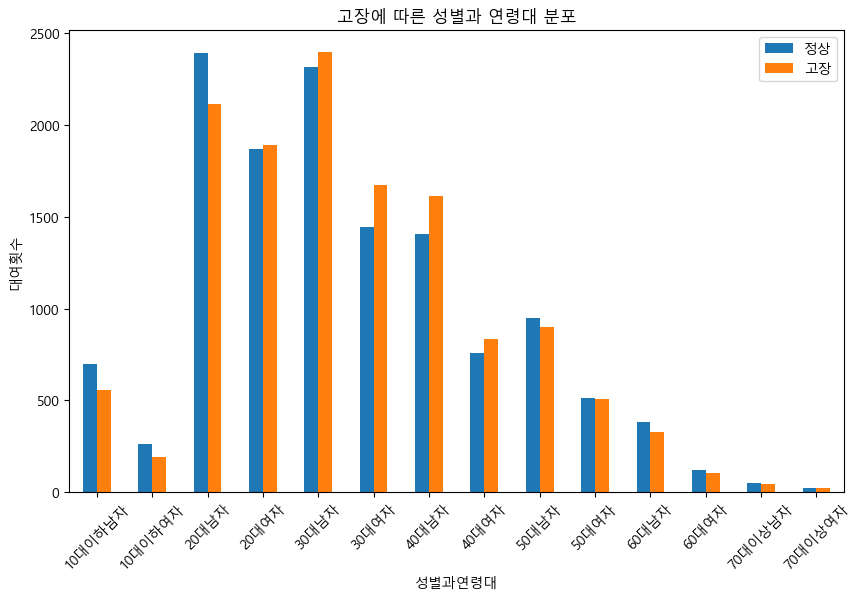

In [24]:
cross_table = pd.crosstab(df['성별과연령대'], df['고장'])
print(cross_table)
print()

for i, row in cross_table.iterrows():
    if row[0] <= row[1]:
        print("고장! {}의 고장이 정상보다 {:.2f}% 많습니다.".format(i, (row[1] - row[0]) / row[0] * 100))
    else:
        print("{}의 정상이 고장보다 {:.2f}% 많습니다.".format(i, (row[0] - row[1]) / row[1] * 100))
        
fig, ax = plt.subplots(figsize=(10, 6))
cross_table.plot(kind='bar', ax=ax)
ax.set_xlabel('성별과연령대')
ax.set_ylabel('대여횟수')
ax.set_title('고장에 따른 성별과 연령대 분포')
ax.legend(['정상', '고장'])
plt.xticks(rotation=45)
plt.show()

처음 딱 봤을떈 뭔가 선형적이고 일관적인 결과가 아닌 것 같습니다. 정리가 필요해보입니다.

<br>

고장과 정상일때 차이가 10% 이상 나는 유의미한 성별연령대를 보면,

- **`정상적으로 타는사람이 많은 성별&연령대`** : 10대 남자, 10대여자, 20대 남자, 60대 남자, 60대 여자, 70대 남자

- **`고장내는사람이 많은 성별&연령대`** : 30대 여자, 40대 남자, 40대 여자

정리하자면, 청소년, 노년층에서 고장내는 비율이 적고, 중장년층에서 고장비율이 많은 것 같습니다.
그리고 40대를 제외하면 여자가 고장내는 비율이 더 높았습니다.

<br>

### 2. 성별과 고장의 연관성 

고장     0     1
성별            
남자  8191  7947
여자  4985  5229

남자의 정상이 고장보다 3.07% 많습니다.
고장! 여자의 고장이 정상보다 4.89% 많습니다.


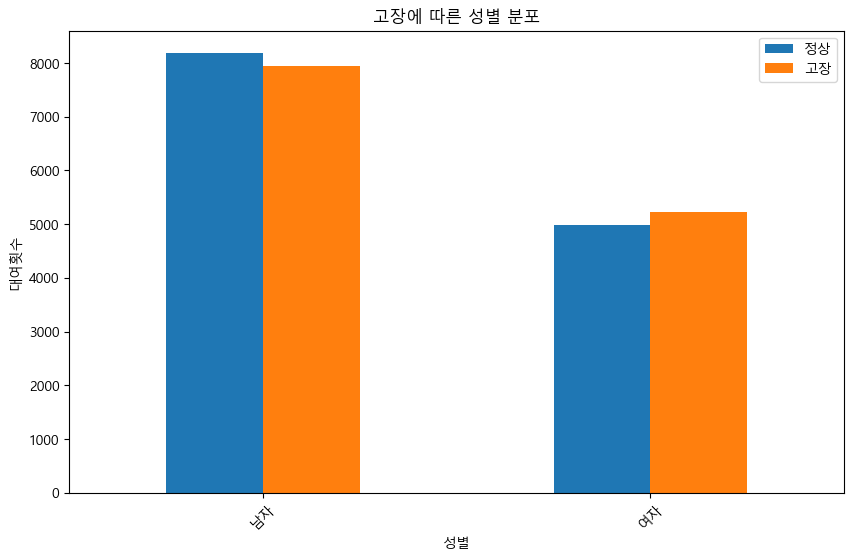

In [25]:
cross_table = pd.crosstab(df['성별'], df['고장'])
print(cross_table)
print()
for i, row in cross_table.iterrows():
    if row[0] <= row[1]:
        print("고장! {}의 고장이 정상보다 {:.2f}% 많습니다.".format(i, (row[1] - row[0]) / row[0] * 100))
    else:
        print("{}의 정상이 고장보다 {:.2f}% 많습니다.".format(i, (row[0] - row[1]) / row[1] * 100))
        
fig, ax = plt.subplots(figsize=(10, 6))
cross_table.plot(kind='bar', ax=ax)
ax.set_xlabel('성별')
ax.set_ylabel('대여횟수')
ax.set_title('고장에 따른 성별 분포')
ax.legend(['정상', '고장'])
plt.xticks(rotation=45)
plt.show()

성별만 놓고 보니 확실히 남자보다 여자가 고장을 내는 비율이 더 많은 것을 알 수 있습니다.

<br>

### 3. 연령대와 고장의 연관성

고장        0     1
연령대              
10대이하   957   752
20대    4260  4001
30대    3756  4068
40대    2162  2446
50대    1463  1407
60대     504   434
70대이상    74    68

10대이하의 정상이 고장보다 27.26% 많습니다.
20대의 정상이 고장보다 6.47% 많습니다.
고장! 30대의 고장이 정상보다 8.31% 많습니다.
고장! 40대의 고장이 정상보다 13.14% 많습니다.
50대의 정상이 고장보다 3.98% 많습니다.
60대의 정상이 고장보다 16.13% 많습니다.
70대이상의 정상이 고장보다 8.82% 많습니다.


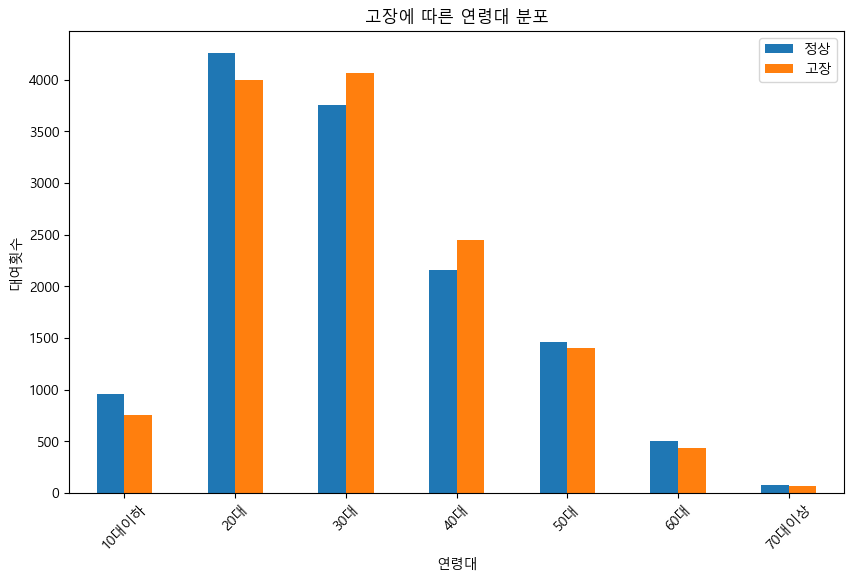

In [26]:
cross_table = pd.crosstab(df['연령대'], df['고장'])
print(cross_table)
print()

diff = []
for i, row in cross_table.iterrows():
    if row[0] <= row[1]:
        print("고장! {}의 고장이 정상보다 {:.2f}% 많습니다.".format(i, (row[1] - row[0]) / row[0] * 100))
    else:
        print("{}의 정상이 고장보다 {:.2f}% 많습니다.".format(i, (row[0] - row[1]) / row[1] * 100))
    diff.append((row[1] - row[0]) / row[1] * 100)
        
fig, ax = plt.subplots(figsize=(10, 6))
cross_table.plot(kind='bar', ax=ax)
ax.set_xlabel('연령대')
ax.set_ylabel('대여횟수')
ax.set_title('고장에 따른 연령대 분포')
ax.legend(['정상', '고장'])
plt.xticks(rotation=45)
plt.show()

연령대만 놓고 보면, 뭔가 선형성이 보이는 것 같습니다. 10대가 가장 고장비율이 적고, 40대로 가면 고장비율이 제일 높았다가, 60대로 가면 다시 높아지고, 70대에선 다시 낮아지는 결과를 볼 수 있었습니다.

아래에 선형그래프로 고장비율을 시각화했습니다.

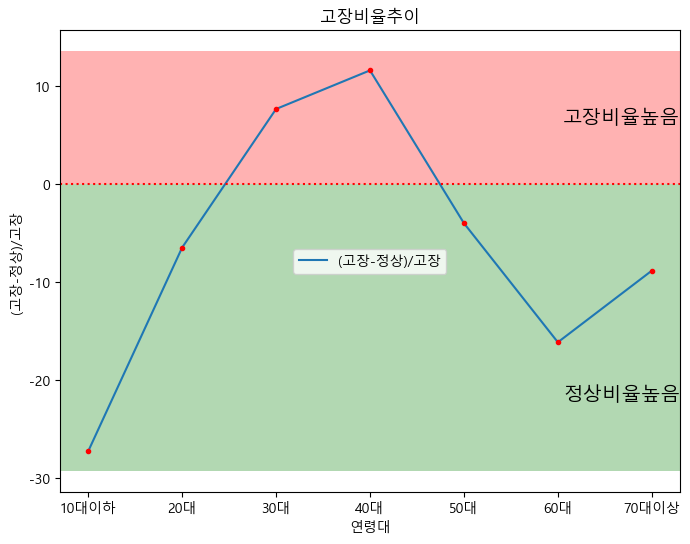

In [27]:
df_broken = pd.DataFrame({'연령대':cross_table.index, '(고장-정상)/고장':diff})
diff = pd.Series(diff)

fig, ax = plt.subplots(figsize=(8, 6))
df_broken.plot(x='연령대', y='(고장-정상)/고장', kind='line', ax=ax)
ax.set_xlabel('연령대')
ax.set_ylabel('(고장-정상)/고장')
ax.set_title('고장비율추이')

ax.axhline(0, color='red', linestyle='dotted')
ax.plot(cross_table.index, diff, 'ro', markersize=3)

ax.axhspan(0, ax.get_ylim()[1], facecolor='red', alpha=0.3) # 상단 배경색
ax.axhspan(ax.get_ylim()[0], 0, facecolor='green', alpha=0.3) # 하단 배경색

ax.annotate('고장비율높음', xy=(1, 0.8), xycoords='axes fraction', fontsize=14, color='black', ha='right')
ax.annotate('정상비율높음', xy=(1, 0.2), xycoords='axes fraction', fontsize=14, color='black', ha='right')

# 플롯 출력
plt.show()

그래프를 그려보니 3차원 선형그래프 정도의 선형성을 가지는것을 볼 수 있었습니다. 흥미로운 결과인 것 같습니다.

<br>

## 결론 및 해석

**결론적으로, 남자보다 여자가 고장을 더 많이 내고, 10대의 낮은 고장비율은 40대까지 높아지다가, 60대까지 낮아지고, 70대부터는 다시 높아집니다.**

해석을 해보자면,

- 10대의 낮은 고장 비율을 보면 젊은층이 따릉이를 더욱 주의 깊게 다루는 것으로 예상됩니다. 아니면, 이 연령대는 체력과 건강이 높아 고장나지 않게 운행을 잘 하는 경향이 있는 것 같습니다.

- 40대 이하 연령대까지 고장 비율이 상승하는 이유는 직장이나 생활 패턴과 연관이 있어보입니다. 출근할때 따릉이를 사용하는 사람이 많은데, 빠르게 가려고 무리하게 따릉이를 운행해서 고장비율이 높지 않을까 생각됩니다.

- 60대까지 고장비율이 낮아지는 이유는 나이가 많아질수록 사고의 위험성에 예민한 사용자들이 자전거를 더 안전하고 조심스럽게 사용하려는 경향이 있기 때문일 수 있습니다.

- 70대부터 고장 비율이 다시 상승하는 이유는 이 연령대의 사람들은 몸의 기능적인 제한으로 인해 따릉이 사용에 더 어려움을 겪을 수 있기 때문일 것 같습니다. 이에 따라 고장 또는 기타 문제가 발생할 가능성이 높아지는 것 같습니다.